# Visualisation section.
## We mostly used subplots comparing each cause to the temperature, seeing how it effects
## The scatter plot shows temperature vs our scaled and combined by PCA data, while the color's brightness relate the year

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

### By quick look of the correlation between each cause and the temperature, we can see the causes are infact the problem with global warming

In [14]:
df = pd.read_csv("mergedClimateChange.csv", index_col = 0)
Temp = df["Temperature"]
CO2 = df["FossilCO2"]
NaturalGasDemand = df["Natural Gas Demand"]
OilProduction = df["Oil Production"]
OilDemand = df["Oil Demand"]
corrCO2 = Temp.corr(CO2)
corrNGS = Temp.corr(NaturalGasDemand)
corrOilP = Temp.corr(OilProduction)
corrOilD = Temp.corr(OilDemand)
print(f"Correlation between Temperature and CO2 Fossil:\n{corrCO2}")
print(f"Correlation between Temperature and Natural Gas Demand:\n{corrNGS}")
print(f"Correlation between Temperature and Oil Production:\n{corrOilP}")
print(f"Correlation between Temperature and Oil Demand:\n{corrOilD}")

Correlation between Temperature and CO2 Fossil:
0.8800627122225829
Correlation between Temperature and Natural Gas Demand:
0.8949953974915055
Correlation between Temperature and Oil Production:
0.8888722340273891
Correlation between Temperature and Oil Demand:
0.8977971657789022


### Temperature vs CO2 fossil

<AxesSubplot:label='477972d5-eca0-48ab-97ee-eacc5393c797'>

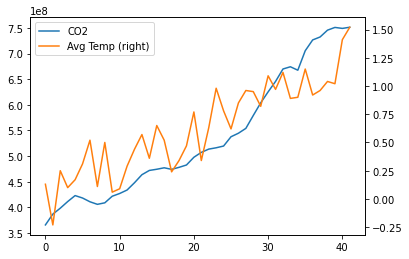

In [78]:
df.FossilCO2.plot(label="CO2", legend=True)
df['Temperature'].plot(secondary_y=True, label="Avg Temp", legend=True)

### Temperature vs natural gas demand

<class 'matplotlib.axes._subplots.AxesSubplot'>


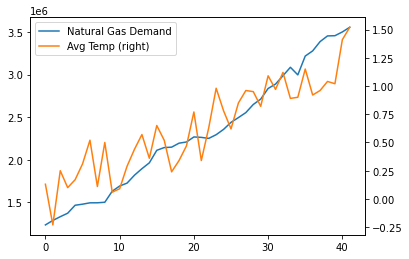

In [92]:
df['Natural Gas Demand'].plot(label="Natural Gas Demand", legend=True)
df['Temperature'].plot(secondary_y=True, label="Avg Temp", legend=True)

### Temperature vs oil production

<AxesSubplot:label='a1aaf5b3-700b-46bf-9f59-a456d586b766'>

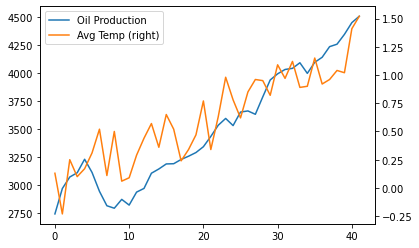

In [83]:
df['Oil Production'].plot(label="Oil Production", legend=True)
df['Temperature'].plot(secondary_y=True, label="Avg Temp", legend=True)

### Temperature vs oil demand

<AxesSubplot:label='c406b4b9-ad57-45b6-a329-989fe271a18a'>

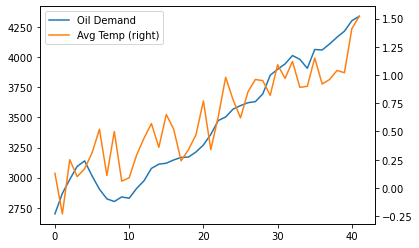

In [85]:
df['Oil Demand'].plot(label="Oil Demand", legend=True)
df['Temperature'].plot(secondary_y=True, label="Avg Temp", legend=True)

## Here we can see scatter plot model.
## y-axis stands for the scaled-merged with PCA data,
## x-axis stands for temperature
## Brightness of the dots stands for: brighter it gets, years more advances
## We can clearly see that our plot goes in diagonal line, which means that the more we, the people, consume resources, the temperature rises, and global waming is, infact, on-the-go

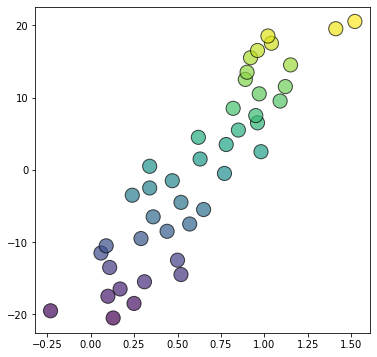

In [90]:
scaler = MinMaxScaler()
df_scalar = df.copy()
df_scalar
df_scalar[['FossilCO2', 'Natural Gas Demand',
           'Oil Production', 'Oil Demand']] = scaler.fit_transform(df_scalar[['FossilCO2',
                                                                           'Natural Gas Demand',
                                                                              'Oil Production', 'Oil Demand']])
pca2 = PCA(n_components=1)
pcComponents = pca2.fit_transform(df_scalar)
ScaledData = list()
for i in pcComponents:
    ScaledData.append(i[0])
newDF = pd.DataFrame({'Year':df["Year"], 'Temperature':df['Temperature'], 'Scaled Data':ScaledData})
x = newDF['Temperature']
y = newDF['Scaled Data']
z = newDF['Year']
fig = plt.figure(figsize=(6, 6))
plt.scatter(x, y,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()